In [1]:
from astropy.table import Table,QTable

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')

from mass_ratio_plottingFunctions import DM_SM_hist, DM_SM_hist_std

import numpy as np

import matplotlib.pyplot as plt

In [2]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = QTable.read('../master_file_vflag_10_smooth2-27.txt', format='ascii.ecsv')

In [3]:
###############################################################################
# Remove bad galaxies
#------------------------------------------------------------------------------
bad_boolean = np.logical_or(master_table['curve_used'] == 'non', master_table['curve_used'] == 'none')

good_galaxies = master_table[np.logical_not(bad_boolean)]
###############################################################################


###############################################################################
# Split galaxies into "walls" and "voids"
#------------------------------------------------------------------------------
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]
###############################################################################


###############################################################################
# Histogram parameters
#------------------------------------------------------------------------------
hist_range = ( 0, 200)
bins = np.linspace( hist_range[0], hist_range[1], 20)
###############################################################################


###############################################################################
# Initialize table to store the number of galaxies in each bin of the 
# histogram(s).
#------------------------------------------------------------------------------
count_table = Table()

# First column is the bins
count_table['Bins'] = bins[1:]
###############################################################################

## Function to calculate shift between populations

In [4]:
def calculate_shift(void_ratios, wall_ratios, void_ratio_errors, wall_ratio_errors):
    '''
    Calculate the average shift between the void and wall populations.
    
    
    Parameters:
    ===========
    
    void_ratios : numpy array of shape (n_void,)
        Array of the mass ratios for the void galaxies
        
    wall_ratios : numpy array of shape (n_wall,)
        Array of the mass ratios for the wall galaxies
        
    void_ratio_errors : numpy array of shape (n_void,)
        Array of the errors in the mass ratios for the void galaxies
        
    wall_ratio_errors : numpy array of shape (n_wall,)
        Array of the errors in the mass ratios for the wall galaxies
    '''
    #######################################################################
    # Calculate averages, shift between voids and walls
    #----------------------------------------------------------------------
    v_mean = np.mean(void_ratios)
    w_mean = np.mean(wall_ratios)

    v_median = np.median(void_ratios)
    w_median = np.median(wall_ratios)

    mean_diff = v_mean - w_mean
    median_diff = v_median - w_median
    #######################################################################


    #######################################################################
    # Calculate uncertainties in the averages and shifts
    #----------------------------------------------------------------------
    # Preserve only finite elements for error calculation
    v_finite = void_ratio_errors[np.isfinite(void_ratio_errors)]
    w_finite = wall_ratio_errors[np.isfinite(wall_ratio_errors)]

    v_mean_err = np.sqrt(np.sum(v_finite**2))/len(v_finite)
    w_mean_err = np.sqrt(np.sum(w_finite**2))/len(w_finite)

    mean_diff_err = np.sqrt(v_mean_err**2 + w_mean_err**2)
    #######################################################################


    print('The average ratio for voids is', v_mean, 'pm', v_mean_err, 'and for walls is', w_mean, 'pm', w_mean_err)
    print('The average difference between the two populations is', mean_diff, 'pm', mean_diff_err)
    print('The median ratio for voids is', v_median, 'and for walls is', w_median)
    print('The median difference between the two populations is', median_diff)

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

The average ratio for voids is 50.4600962411499 pm 45154961.350431375 and for walls is 20.06499984807753 pm 36971868.22565344
The average difference between the two populations is 30.395096393072368 pm 58359999.782848135
The median ratio for voids is 7.078388968479117 and for walls is 6.447230585085773
The median difference between the two populations is 0.6311583833933438


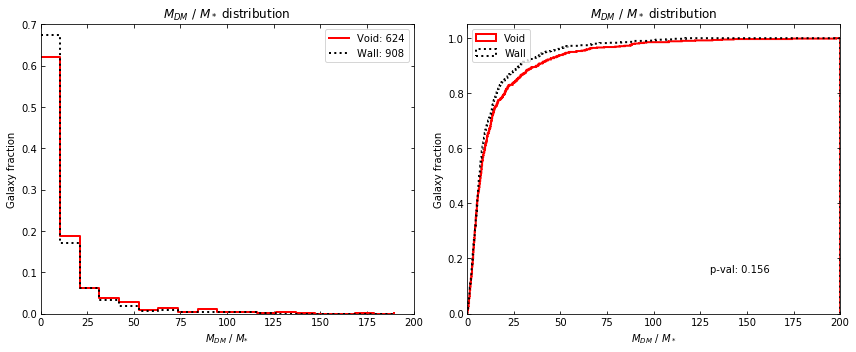

In [5]:
calculate_shift(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], 
                void_table['Mdark_Mstar_ratio_error'], wall_table['Mdark_Mstar_ratio_error'])

DM_SM_hist(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], bins, hist_range, 
           y_max=0.7)#, save_fig=True, FILE_SUFFIX='_all', IMAGE_DIR=IMAGE_DIR)

# Bin by absolute magnitude

### Dwarf galaxies ($M_r > -17$)

The average ratio for voids is 28.219779070207498 pm 65233161.00802056 and for walls is 0.6681892975801446 pm 227789676.9215645
The median ratio for voids is 2.9112121311729657 and for walls is 0.6681892975801446
The average difference between the two populations is 27.551589772627352 pm 236946201.08186808
The median difference between the two populations is 2.2430228335928213


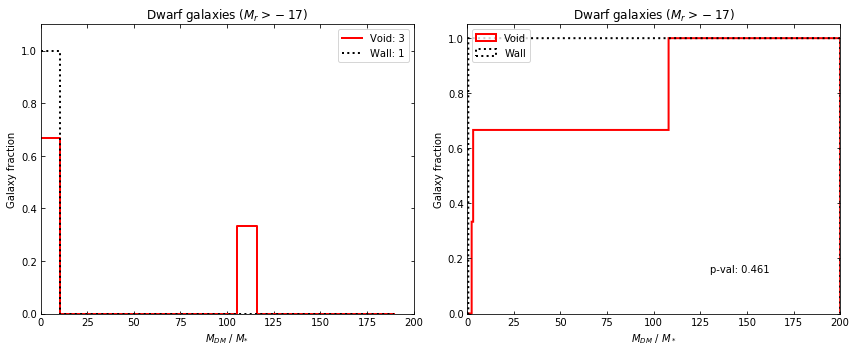

In [9]:
vboolean = void_table['rabsmag'].data >= -17
wboolean = wall_table['rabsmag'].data >= -17

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dwarf_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
dwarf_void = void_table['Mdark_Mstar_ratio'][vboolean].data

dwarf_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
dwarf_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

dwarf_wall_table = wall_table[wboolean]
dwarf_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_dwarf'], _ = np.histogram(dwarf_void, bins)
count_table['w_dwarf'], _ = np.histogram(dwarf_wall, bins)
###########################################################################


calculate_shift(dwarf_void, dwarf_wall, dwarf_void_err, dwarf_wall_err)

DM_SM_hist(dwarf_void, dwarf_wall, bins, hist_range, y_max=1.1, 
           plot_title='Dwarf galaxies ($M_r > -17$)')#, save_fig=True, 
           #FILE_SUFFIX='_dwarf', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -17 and -18 in $M_r$

The average ratio for voids is 26.92917523503477 pm 370273884.035071 and for walls is 36.684137630424146 pm 231795042.0982307
The median ratio for voids is 14.515525181134361 and for walls is 13.133821435141531
The average difference between the two populations is -9.754962395389377 pm 436842867.3330237
The median difference between the two populations is 1.38170374599283


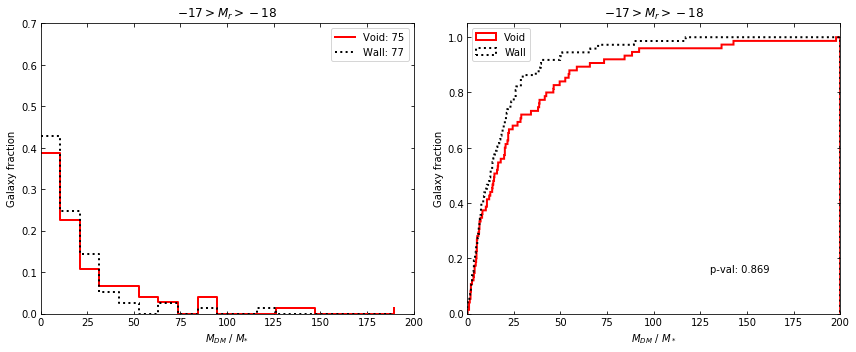

In [10]:
vboolean = np.logical_and(void_table['rabsmag'].data < -17, void_table['rabsmag'].data >= -18)
wboolean = np.logical_and(wall_table['rabsmag'].data < -17, wall_table['rabsmag'].data >= -18)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g17_18_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g17_18_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g17_18_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g17_18_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g17_18_wall_table = wall_table[wboolean]
g17_18_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_17_18'], _ = np.histogram(g17_18_void, bins)
count_table['w_17_18'], _ = np.histogram(g17_18_wall, bins)
###########################################################################


calculate_shift(g17_18_void, g17_18_wall, g17_18_void_err, g17_18_wall_err)

DM_SM_hist(g17_18_void, g17_18_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-17 > M_r > -18$')#, save_fig=True, FILE_SUFFIX='_17-18', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies fainter than -18 in $M_r$

The average ratio for voids is 26.992908757759345 pm 352003494.68666625 and for walls is 36.22823955026156 pm 228879090.9519806
The median ratio for voids is 14.179354773271887 and for walls is 12.76761815190527
The average difference between the two populations is -9.235330792502218 pm 419871526.239433
The median difference between the two populations is 1.411736621366618


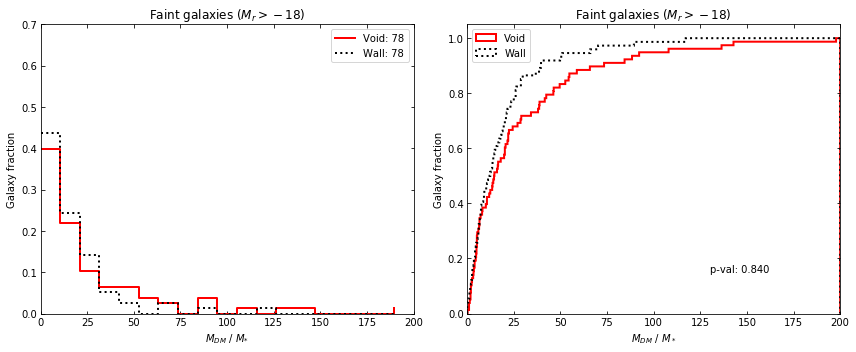

In [11]:
vboolean = void_table['rabsmag'].data >= -18
wboolean = wall_table['rabsmag'].data >= -18

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
faint_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
faint_void = void_table['Mdark_Mstar_ratio'][vboolean].data

faint_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
faint_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

faint_wall_table = wall_table[wboolean]
faint_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_faint'], _ = np.histogram(faint_void, bins)
count_table['w_faint'], _ = np.histogram(faint_wall, bins)
###########################################################################


calculate_shift(faint_void, faint_wall, faint_void_err, faint_wall_err)

DM_SM_hist(faint_void, faint_wall, bins, hist_range, y_max=0.7, 
           plot_title='Faint galaxies ($M_r > -18$)')#, save_fig=True, 
           #FILE_SUFFIX='_faint', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -18 and -19 in $M_r$

The average ratio for voids is 25.978532960487936 pm 27085024.862242907 and for walls is 47.13406137728298 pm 117175314.09146807
The median ratio for voids is 11.541044957567669 and for walls is 10.400187930861158
The average difference between the two populations is -21.155528416795047 pm 120264927.57334746
The median difference between the two populations is 1.1408570267065112


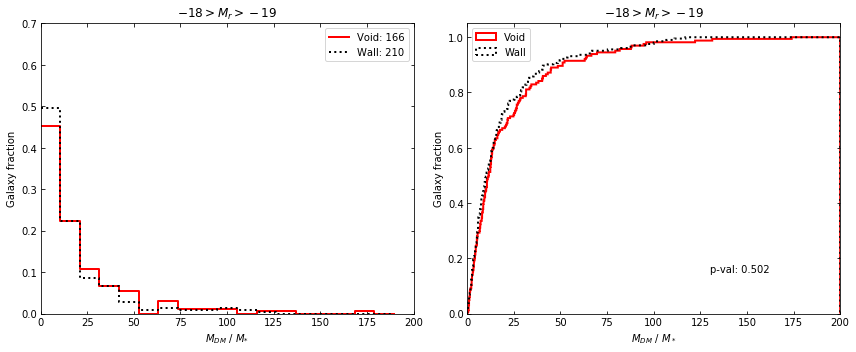

In [12]:
vboolean = np.logical_and(void_table['rabsmag'].data < -18, void_table['rabsmag'].data >= -19)
wboolean = np.logical_and(wall_table['rabsmag'].data < -18, wall_table['rabsmag'].data >= -19)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g18_19_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g18_19_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g18_19_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g18_19_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g18_19_wall_table = wall_table[wboolean]
g18_19_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_18_19'], _ = np.histogram(g18_19_void, bins)
count_table['w_18_19'], _ = np.histogram(g18_19_wall, bins)
###########################################################################


calculate_shift(g18_19_void, g18_19_wall, g18_19_void_err, g18_19_wall_err)

DM_SM_hist(g18_19_void, g18_19_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-18 > M_r > -19$')#, save_fig=True, FILE_SUFFIX='_18-19', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -19 and -20 in $M_r$

The average ratio for voids is 141.0804233365373 pm 11856235.379211918 and for walls is 11.43384698890273 pm 49316943.35783802
The median ratio for voids is 7.102075367734857 and for walls is 6.574619025464763
The average difference between the two populations is 129.64657634763458 pm 50722097.940912105
The median difference between the two populations is 0.527456342270094


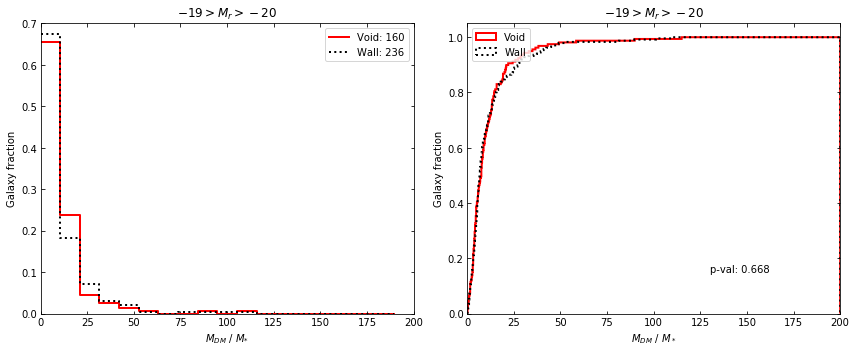

In [13]:
vboolean = np.logical_and(void_table['rabsmag'].data < -19, void_table['rabsmag'].data >= -20)
wboolean = np.logical_and(wall_table['rabsmag'].data < -19, wall_table['rabsmag'].data >= -20)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g19_20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g19_20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g19_20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g19_20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g19_20_wall_table = wall_table[wboolean]
g19_20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_19_20'], _ = np.histogram(g19_20_void, bins)
count_table['w_19_20'], _ = np.histogram(g19_20_wall, bins)
###########################################################################


calculate_shift(g19_20_void, g19_20_wall, g19_20_void_err, g19_20_wall_err)

DM_SM_hist(g19_20_void, g19_20_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-19 > M_r > -20$')#, save_fig=True, FILE_SUFFIX='_19-20', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies with $M_r < -20$

The average ratio for voids is 10.507753406953121 pm 2191604.1875334717 and for walls is 7.55687236032551 pm 24260455.615735568
The median ratio for voids is 4.999677619824823 and for walls is 5.34178151724821
The average difference between the two populations is 2.950881046627611 pm 24359245.382357184
The median difference between the two populations is -0.342103897423387


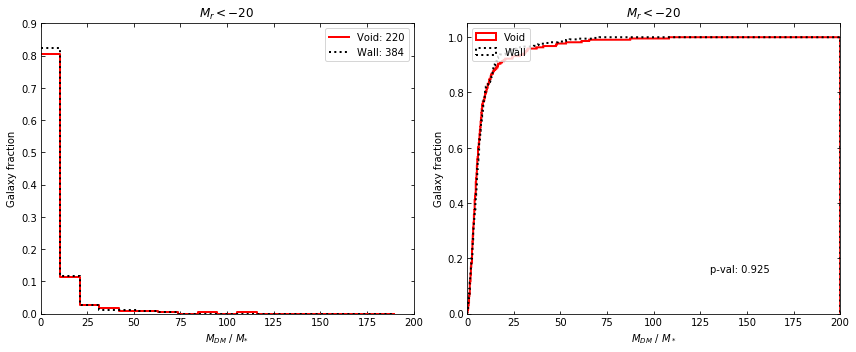

In [16]:
vboolean = void_table['rabsmag'].data < -20
wboolean = wall_table['rabsmag'].data < -20

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g20_wall_table = wall_table[wboolean]
g20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_20plus'], _ = np.histogram(g20_void, bins)
count_table['w_20plus'], _ = np.histogram(g20_wall, bins)
###########################################################################


calculate_shift(g20_void, g20_wall, g20_void_err, g20_wall_err)

DM_SM_hist(g20_void, g20_wall, bins, hist_range, y_max=0.9, 
           plot_title='$M_r < -20$')#, 
           #save_fig=True, FILE_SUFFIX='_bright', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -20 and -21 in $M_r$

The average ratio for voids is 11.062232548213828 pm 48.33284143033957 and for walls is 6.498159317988704 pm 6423516.590055958
The median ratio for voids is 5.061336216008626 and for walls is 5.001562839931532
The average difference between the two populations is 4.564073230225124 pm 6423516.590237795
The median difference between the two populations is 0.059773376077093765


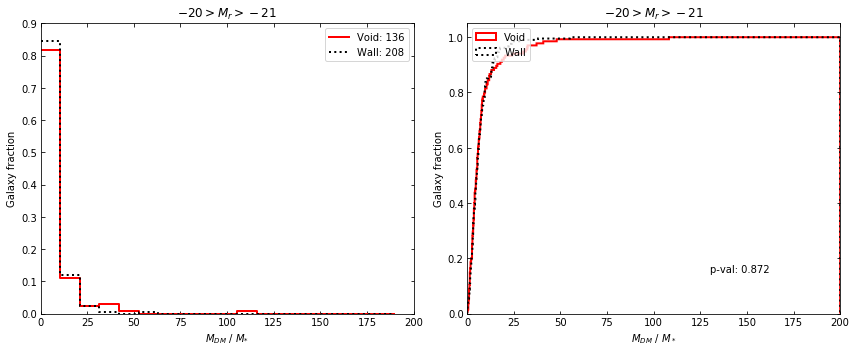

In [18]:
vboolean = np.logical_and(void_table['rabsmag'].data < -20, void_table['rabsmag'].data >= -21)
wboolean = np.logical_and(wall_table['rabsmag'].data < -20, wall_table['rabsmag'].data >= -21)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_21_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g20_21_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g20_21_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g20_21_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g20_21_wall_table = wall_table[wboolean]
g20_21_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_20_21'], _ = np.histogram(g20_21_void, bins)
count_table['w_20_21'], _ = np.histogram(g20_21_wall, bins)
###########################################################################


calculate_shift(g20_21_void, g20_21_wall, g20_21_void_err, g20_21_wall_err)

DM_SM_hist(g20_21_void, g20_21_wall, bins, hist_range, y_max=0.9, 
           plot_title='$-20 > M_r > -21$')#, save_fig=True, FILE_SUFFIX='_19-20', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies with $M_r < -21$

The average ratio for voids is 9.621861445628545 pm 5693132.716517259 and for walls is 8.806500869313217 pm 52349551.74091342
The median ratio for voids is 4.902118945014515 and for walls is 5.4474884797442495
The average difference between the two populations is 0.815360576315328 pm 52658212.347196616
The median difference between the two populations is -0.5453695347297343


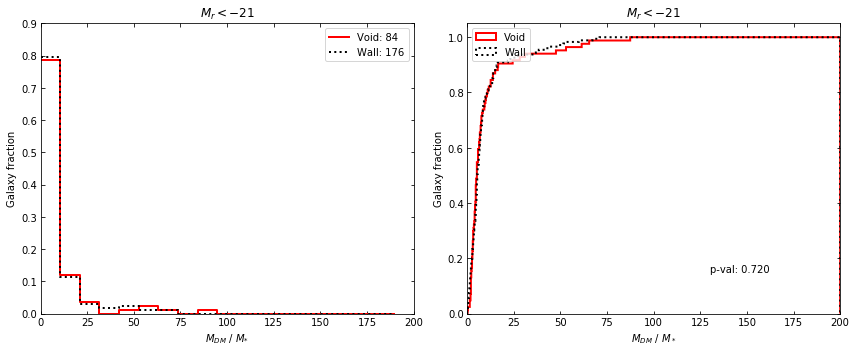

In [19]:
vboolean = void_table['rabsmag'].data < -21
wboolean = wall_table['rabsmag'].data < -21

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g21_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g21_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g21_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g21_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g21_wall_table = wall_table[wboolean]
g21_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_21plus'], _ = np.histogram(g21_void, bins)
count_table['w_21plus'], _ = np.histogram(g21_wall, bins)
###########################################################################


calculate_shift(g21_void, g21_wall, g21_void_err, g21_wall_err)

DM_SM_hist(g21_void, g21_wall, bins, hist_range, y_max=0.9, 
           plot_title='$M_r < -21$')#, 
           #save_fig=True, FILE_SUFFIX='_bright', IMAGE_DIR=IMAGE_DIR)

## Mass ratio v. $M_r$

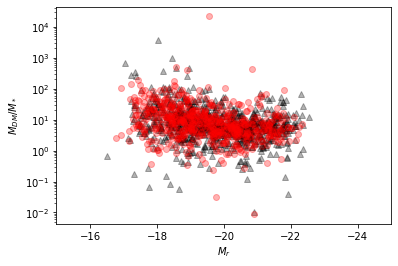

In [20]:
plt.figure()
plt.semilogy(wall_table['rabsmag'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.3)
plt.semilogy(void_table['rabsmag'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.3)
plt.xlim(-15,-25)
plt.xlabel('$M_r$')
plt.ylabel('$M_{DM}$/$M_*$')
plt.show()

## Write histogram table to file

In [ ]:
count_table.write('histogram_counts.txt', format='ascii.commented_header')

## Statistics

In [ ]:
g20_void_table.sort('Mdark_Mstar_ratio')
g20_wall_table.sort('Mdark_Mstar_ratio')

print(sum(g20_void_table['Mdark_Mstar_ratio'] > 1E4))
print(sum(g20_wall_table['Mdark_Mstar_ratio'] > 1E4))

In [ ]:
g19_20_void_table.sort('Mdark_Mstar_ratio')
g19_20_wall_table.sort('Mdark_Mstar_ratio')

print(g19_20_void_table[g19_20_void_table['Mdark_Mstar_ratio'] > 1E4])
print(g19_20_wall_table[g19_20_wall_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
g18_19_void_table.sort('Mdark_Mstar_ratio')
g18_19_wall_table.sort('Mdark_Mstar_ratio')

#print(sum(g18_19_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(g18_19_wall_table['Mdark_Mstar_ratio'] > 1E4))
print(g18_19_void_table[g18_19_void_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
#print(sum(g17_18_void_table['Mdark_Mstar_ratio'] > 1E6))
#print(sum(g17_18_wall_table['Mdark_Mstar_ratio'] > 1E6))
g17_18_void_table[g17_18_void_table['Mdark_Mstar_ratio'] > 1E4].pprint()
g17_18_wall_table[g17_18_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()

In [ ]:
#print(sum(dwarf_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(dwarf_wall_table['Mdark_Mstar_ratio'] > 1E6))
dwarf_wall_table[dwarf_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()